In [39]:
# Standard librariees
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame

#Statistics
from scipy import stats

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [40]:
# Libraries for time series analysis
import os
import sys
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as smtools
import scipy.stats as scs
from arch import arch_model

In [41]:
df = pd.read_stata('homes.dta')

In [42]:
df.head()

,homes,irate
0,676,8.43
1,639,8.76
2,554,8.94
3,546,8.85
4,554,8.67


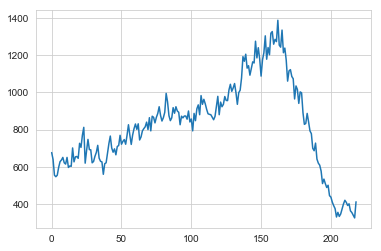

In [43]:
df['homes'].plot() 

plt.show()

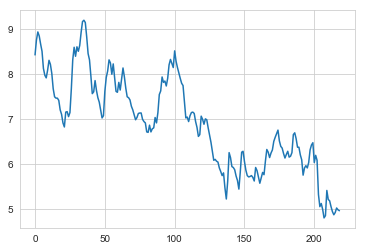

In [44]:
df['irate'].plot() 
plt.show()

In [45]:
#Create data index
ts = pd.period_range(start = '1.1.1992',end = '3.1.2010', freq='M')
df['Date'] = ts
df.set_index('Date',inplace=True)

In [46]:
#Implement the test for our simulated data
from statsmodels.tsa.stattools import adfuller

In [47]:
result = adfuller(df['homes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.227023
p-value: 0.904818
Critical Values:
	1%: -4.003
	5%: -3.432
	10%: -3.140


In [48]:
df['dhomes'] = df['homes'].diff(periods=1)
df['dirate'] = df['irate'].diff(periods=1)
df.dropna(inplace=True)


In [49]:
df.parse_dates=[0]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


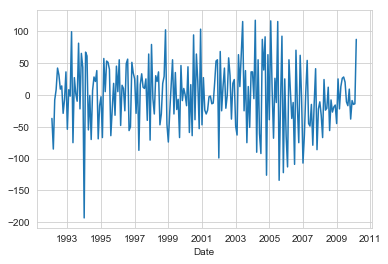

In [50]:
df['dhomes'].plot() 
plt.show()

In [51]:
result = adfuller(df['dhomes'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.425932
p-value: 0.000000
Critical Values:
	1%: -4.002
	5%: -3.431
	10%: -3.139


In [52]:
result = adfuller(df['dirate'],regression='ct', autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.673954
p-value: 0.000000
Critical Values:
	1%: -4.002
	5%: -3.431
	10%: -3.139


In [53]:
#creating lagged variables
df['lag1_dhomes'] = df['dhomes'].shift(1)
df['lag1_dirate'] = df['dirate'].shift(1)
df['lag2_dirate'] = df['dirate'].shift(2)
df.dropna(inplace=True)

In [54]:
df.head()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate
Date,,,,,,,
1992-04,546,8.85,-8.0,-0.09,-85.0,0.18,0.33
1992-05,554,8.67,8.0,-0.18,-8.0,-0.09,0.18
1992-06,596,8.51,42.0,-0.16,8.0,-0.18,-0.09
1992-07,627,8.13,31.0,-0.38,42.0,-0.16,-0.18
1992-08,636,7.98,9.0,-0.15,31.0,-0.38,-0.16


In [55]:
# Prepare target and input variables. 
X_multi=df.drop(['homes','irate','dhomes','dirate'], axis=1)
Y_target=df.dhomes

In [56]:
# Add the costant to our input variables
X_multi=sm.tools.tools.add_constant(X_multi, prepend=True, has_constant='skip')

In [57]:
# OLS Regression
mod = sm.OLS(Y_target, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 dhomes   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     12.40
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.67e-07
Time:                        22:14:27   Log-Likelihood:                -1143.7
No. Observations:                 216   AIC:                             2295.
Df Residuals:                     212   BIC:                             2309.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.4912      3.333     -0.748      

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot

# Part 2.1

# 9.19-c

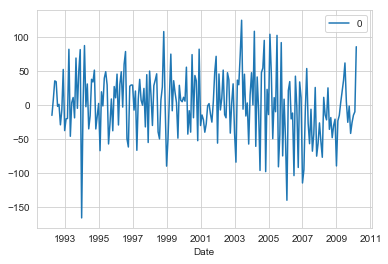

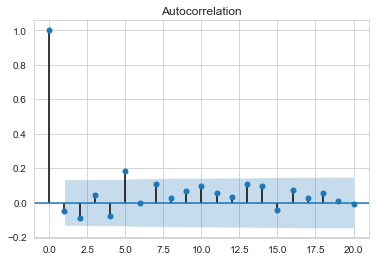

In [59]:
# OLS Regression
model = sm.OLS(Y_target, X_multi)
model_fit = model.fit(disp=0)

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=20)
pyplot.show()

In [60]:
# the ACF plot suggests that there is a significant serial correlation at lag-5 

# 9.19-f

In [61]:
#creating lagged variables
df['lag1_dhomes'] = df['dhomes'].shift(1)
df['lag5_dhomes'] = df['dhomes'].shift(5)
df['lag1_dirate'] = df['dirate'].shift(1)
df['lag3_dirate'] = df['dirate'].shift(3)
df.dropna(inplace=True)

In [62]:
df.head()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate,lag5_dhomes,lag3_dirate
Date,,,,,,,,,
1992-09,650,7.92,14.0,-0.06,9.0,-0.15,-0.38,-8.0,-0.16
1992-10,621,8.09,-29.0,0.17,14.0,-0.06,-0.15,8.0,-0.38
1992-11,614,8.31,-7.0,0.22,-29.0,0.17,-0.06,42.0,-0.15
1992-12,650,8.22,36.0,-0.09,-7.0,0.22,0.17,31.0,-0.06
1993-01,596,8.02,-54.0,-0.20,36.0,-0.09,0.22,9.0,0.17


In [63]:
# Prepare target and input variables. 
X2_multi=df.drop(['homes','irate','dhomes','dirate','lag2_dirate'], axis=1)
Y_target=df.dhomes

In [64]:
# Add the costant to our input variables
X2_multi=sm.tools.tools.add_constant(X2_multi, prepend=True, has_constant='skip')

In [65]:
# OLS Regression
mod = sm.OLS(Y_target, X2_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 dhomes   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     13.19
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.38e-09
Time:                        22:14:29   Log-Likelihood:                -1112.1
No. Observations:                 211   AIC:                             2234.
Df Residuals:                     206   BIC:                             2251.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1238      3.306     -0.945      

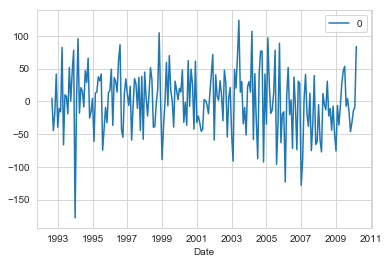

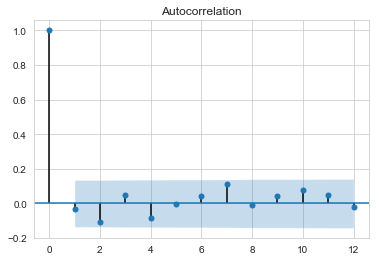

In [73]:
# OLS Regression
model = sm.OLS(Y_target, X2_multi)
model_fit = model.fit(disp=0)

# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
plot_acf(residuals,lags=12)
pyplot.show()

In [74]:
# the model has improved- there is no serially correlated errors, all coefficients are significant (p_values<0.05)
# and both AIC & BIC have decreased, which is an indication of improvement

# 9.20-b

In [75]:
df.tail()

,homes,irate,dhomes,dirate,lag1_dhomes,lag1_dirate,lag2_dirate,lag5_dhomes,lag3_dirate
Date,,,,,,,,,
2009-11,362,4.88,-38.0,-0.07,9.0,-0.11,-0.13,28.0,-0.03
2009-12,353,4.93,-9.0,0.05,-38.0,-0.07,-0.11,20.0,-0.13
2010-01,338,5.03,-15.0,0.10,-9.0,0.05,-0.07,-11.0,-0.11
2010-02,324,4.99,-14.0,-0.04,-15.0,0.10,0.05,-17.0,-0.07
2010-03,411,4.97,87.0,-0.02,-14.0,-0.04,0.10,9.0,0.05


In [76]:
# predict april, may, and june values based on the defined equation

In [77]:
april=-2.8845+0.6928*411+0.3072*324-38*0.2112+0.04*64.7648-0.05*47.3826  
print(april)

373.584962


In [78]:
may=-2.8845+0.6928*374+0.3072*411-9*0.2112+0.02*64.7648-0.1*47.3826
print(may)

377.138136


In [79]:
june=-2.8845+0.6928*377+ 0.3072*374-15*0.2112+0*64.7648+0.04*47.3826
print(june)

371.921204


# 9.20-c

In [80]:
import math
error_variance=int(residuals.var())
math.sqrt(error_variance)

47.19110085598767

In [81]:
# standard error (Formula 9.68, p-374)
april_se=math.sqrt(error_variance)
print(april_se)
may_se=47.46*math.sqrt(1+(0.6928**2))
print(may_se)
june_se=47.46*math.sqrt((0.6928**2+0.3072)**2+0.6928**2+1)
print(june_se)

47.19110085598767
57.73703264771184
68.76970942919061


In [83]:
# compute intervals 
april_se1=374-1.971*47.5
april_se2=374+1.971*47.5
print("April:",april_se1,april_se2)
may_se1=377-1.971*57.7
may_se2=377+1.971*57.7
print("May:", may_se1,may_se2)
june_se1=372-1.971*68.8
june_se2=372+1.971*68.8
print("June:", june_se1,june_se2)

April: 280.3775 467.6225
May: 263.2733 490.7267
June: 236.3952 507.6048


# Part 2.2

In [150]:
data = pd.read_csv('annual-domestic-sales-and-advert.csv')

In [151]:
data.tail()

,Year,Advertising,Sales
49,1956,802,1657
50,1957,770,1569
51,1958,639,1390
52,1959,644,1387
53,1960,564,1289


In [152]:
#Create data index
ts = pd.period_range(start = '1907',end = '1960', freq='Y')
data['Year'] = ts
data.set_index('Year',inplace=True)

In [153]:
data.head()

,Advertising,Sales
Year,,
1907,608,1016
1908,451,921
1909,529,934
1910,543,976
1911,525,930


In [155]:
x=data.Advertising
y=data.Sales

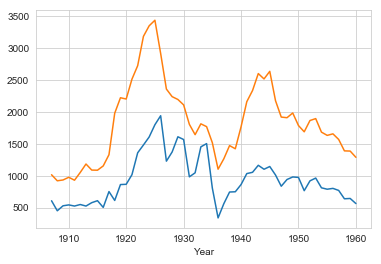

In [156]:
data['Advertising'].plot() 
data['Sales'].plot() 
plt.show()

In [157]:
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.422391
p-value: 0.135516
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


In [158]:
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.391303
p-value: 0.144206
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


In [159]:
# p_value>0.05, so fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
# therefore x & y are not cointegrated and the similar patterns canbe the result of spurious correlation.
# However in order to check further...

In [160]:
#cointegration
smtools.coint(x, y, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-2.041922791906205,
 0.5067287044866338,
 array([-4.11501519, -3.45384388, -3.12544096]))

In [161]:
# advertising and sales  are not cointegrated (p_value>0.05) 
# & any apparent regression relationship between them is spurious

In [162]:
x_multi = data['Advertising'].diff(periods=1)
y_multi = data['Sales'].diff(periods=1)

In [163]:
x_multi.dropna(inplace=True)
y_multi.dropna(inplace=True)

In [164]:
result = adfuller(y_multi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.471455
p-value: 0.000221
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597


In [165]:
result = adfuller(x_multi)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.791014
p-value: 0.059569
Critical Values:
	1%: -3.571
	5%: -2.923
	10%: -2.599


In [166]:
# we can see that with differencing the data get stationary

In [167]:
#cointegration
smtools.coint(x_multi, y_multi, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-3.9711864453771715,
 0.0078903275959072,
 array([-4.1194525 , -3.45615522, -3.12701746]))

In [168]:
# we can see that p_value<0.05, so the data is cointegrated and we can estimate long-run relationship between x & y

In [169]:
# add constant
x_multi=sm.tools.tools.add_constant(x, prepend=True, has_constant='skip')

In [170]:
# OLS Regression
mod = sm.OLS(y, x_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sat, 09 Mar 2019   Prob (F-statistic):           1.26e-15
Time:                        23:27:35   Log-Likelihood:                -390.91
No. Observations:                  54   AIC:                             785.8
Df Residuals:                      52   BIC:                             789.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         488.8327    127.439      3.836      

# Granger causality

In [171]:
# as data is non_stationary there can not be a ginger causality for x & y, yet there can be for their differences

In [172]:
from statsmodels.tsa.stattools import grangercausalitytests

In [181]:
df=pd.DataFrame(y_multi).join(x_multi)
df.dropna(inplace=True)
df=df.drop(["const"], axis=1)

In [182]:
df.head()

,Sales,Advertising
Year,,
1908,-95.0,451
1909,13.0,529
1910,42.0,543
1911,-46.0,525
1912,122.0,549


In [178]:
print(grangercausalitytests(data[['Sales','Advertising']], maxlag=3, addconst=True, verbose=True))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.2367  , p=0.0060  , df_denom=50, df_num=1
ssr based chi2 test:   chi2=8.7309  , p=0.0031  , df=1
likelihood ratio test: chi2=8.0821  , p=0.0045  , df=1
parameter F test:         F=8.2367  , p=0.0060  , df_denom=50, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.6505  , p=0.0812  , df_denom=47, df_num=2
ssr based chi2 test:   chi2=5.8649  , p=0.0533  , df=2
likelihood ratio test: chi2=5.5571  , p=0.0621  , df=2
parameter F test:         F=2.6505  , p=0.0812  , df_denom=47, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8284  , p=0.1559  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=6.3577  , p=0.0954  , df=3
likelihood ratio test: chi2=5.9916  , p=0.1120  , df=3
parameter F test:         F=1.8284  , p=0.1559  , df_denom=44, df_num=3
{1: ({'ssr_ftest': (8.236671407196823, 0.0060019418606116195, 50.0, 1), 'ssr_chi2test': (8.730871691

In [179]:
# no granger causility, as p_value are high, that is  advetising does NOT Granger 
#causes sales. 

In [183]:
# in lag 1 there is granger causality as p_value<0.05, that is range causality 
# means that past values of advertising have a statistically significant effect on the current value of sales